In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from IPython import display
import math
from scipy.signal import savgol_filter

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/cybercat37794/Computer-Vision-and-Pattern-Recognition/main/HW_1/dataset3%20-%20Sheet1.csv')
print(df.head())

   X1  X2  Y
0   4   8  0
1  61  56  1
2  68  65  1
3  59  68  1
4  31  66  1


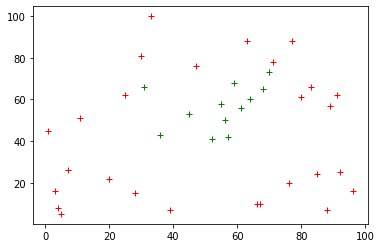

In [7]:
X1 = df['X1'].values.tolist()
X2 = df['X2'].values.tolist()
Y = df['Y'].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], 'r+')
    else:
        plt.plot(X1[i], X2[i], 'g+')

In [8]:
W = [random.random(), random.random()]
b = random.random()

In [9]:
lr = 0.5
theta = 0.5
epoch = 0
count = 0
loss = []

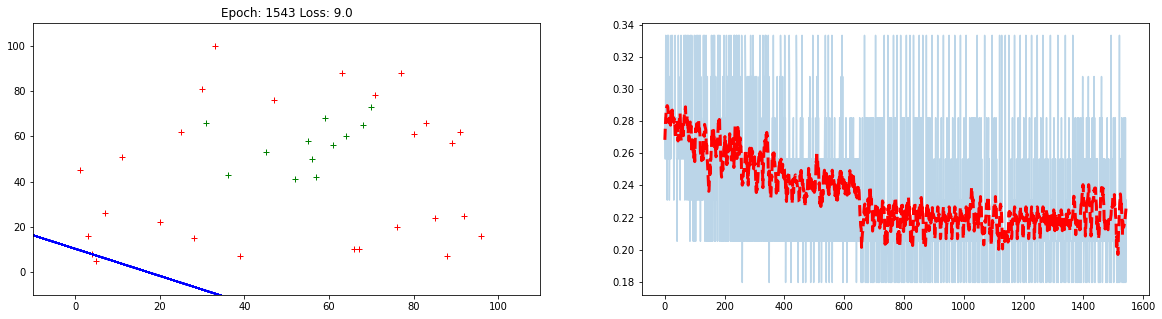

Epoch: 1543 Loss: 0.23076923076923075


In [ ]:
while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error ** 2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1 / len(X1) * total_error)
    
    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait = True)
    plt.subplot(1, 2, 1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr = (theta-b) / W[0]
        yintr = (theta-b) / W[1]

        slope = -yintr / xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope * x + yintr)
        plt.plot(xx, yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1, 2, 2)
    plt.plot(loss, alpha = 0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=  3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1